In [668]:
Lending_Club_Case_Study = '''a consumer finance company which specialises in lending various types 
of loans to urban customers. When the company receives a loan application, the company has to make 
a decision for loan approval based on the applicant’s profile.'''

In [669]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
import sys

## Data Cleaning

In [670]:
loan = pd.read_csv('loan.csv',encoding = 'ISO-8859-1') # Data loading
pd.set_option('display.max_row', 4000)

pd.set_option('display.max_columns', 4000)

In [671]:
display(loan)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [672]:
loan['loan_amnt'] = loan[loan['loan_amnt']!=0] # replacing anywhere if loan amount is zero

In [673]:
display(loan)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,1077501,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,1077430,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,1077175,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,1076863,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [674]:
loan.isnull().sum()/loan.shape[0]*100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [675]:
after_na_loan = loan.dropna(axis='columns',how='all')

In [676]:
after_na_loan.isnull().sum()/after_na_loan.shape[0]*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [677]:
after_na_loan = after_na_loan.drop(['next_pymnt_d','mths_since_last_delinq','mths_since_last_record','desc'], axis=1)

In [678]:
after_na_loan.isnull().sum()/after_na_loan.shape[0]*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [679]:
after_na_loan['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [680]:
#Replacing NA pub_rec_bankruptcies with 0
after_na_loan['pub_rec_bankruptcies']=after_na_loan['pub_rec_bankruptcies'].fillna(0)

In [681]:
after_na_loan['pub_rec_bankruptcies'].unique()

array([0., 1., 2.])

In [682]:
after_na_loan.groupby('pub_rec_bankruptcies').count()/loan.shape[0] * 100

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
pub_rec_bankruptcies,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,95.767555,95.767555,95.767555,95.767555,95.767555,95.767555,95.767555,95.767555,95.767555,95.767555,89.996727,93.340383,95.767555,95.767555,95.767555,95.767555,95.767555,95.767555,95.767555,95.767555,95.739860,95.767555,95.767555,95.767555,95.767555,95.767555,95.767555,95.767555,95.767555,95.767555,95.644183,95.767555,95.767555,95.767555,95.767555,95.767555,95.767555,95.767555,95.767555,95.767555,95.767555,95.767555,95.603898,95.767555,95.762520,95.631594,95.767555,95.767555,95.767555,95.631594,95.767555,95.669361
1.0,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,3.794345,3.935343,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.212302,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.214820,4.199713,4.214820,4.214820,4.209784,4.214820,4.214820,4.214820,4.209784,4.214820,4.214820
2.0,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625,0.017625


In [683]:
display(after_na_loan['emp_title'].unique())

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

In [684]:
#Replacing NA emp title with Job Title Not Provided
after_na_loan['emp_title']=after_na_loan['emp_title'].fillna('Job Title Not Provided')

In [685]:
print(after_na_loan['emp_title'].unique())

['Job Title Not Provided' 'Ryder' 'AIR RESOURCES BOARD' ...
 'FiSite Research' 'Squarewave Solutions, Ltd.' 'Evergreen Center']


In [686]:
print(after_na_loan['revol_util'])

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 39717, dtype: object


In [687]:
#removing % from the revol_util column
after_na_loan['revol_util'] = after_na_loan['revol_util'].str.split("%",expand = True)[0]
#Replacing all util column by median
revol_util_median = after_na_loan['revol_util'].astype(float).median()
after_na_loan['revol_util'] = after_na_loan['revol_util'].fillna(revol_util_median)

In [688]:
#Converting loan_amnt from object to Integer
after_na_loan['loan_amnt'] = after_na_loan['loan_amnt'].astype(int)

In [689]:
print(after_na_loan['revol_util'])

0        83.70
1         9.40
2        98.50
3           21
4        53.90
         ...  
39712    13.10
39713    26.90
39714    19.40
39715     0.70
39716    51.50
Name: revol_util, Length: 39717, dtype: object


In [690]:
print(after_na_loan['emp_length'].unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


In [691]:
after_na_loan.isnull().sum()/after_na_loan.shape[0]*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.000000
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [692]:
after_na_loan['earliest_cr_line'].unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96', 'Nov-04',
       'Jul-05', 'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89',
       'Jul-03', 'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03',
       'Jan-01', 'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01',
       'Feb-02', 'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Feb-97',
       'Apr-05', 'Oct-07', 'Dec-00', 'Apr-07', 'Dec-01', 'Jan-03',
       'Mar-94', 'Sep-98', 'Jun-04', 'Nov-95', 'Jul-99', 'Jun-95',
       'Sep-92', 'Jan-02', 'Apr-92', 'Oct-06', 'May-00', 'Dec-98',
       'Dec-04', 'Oct-00', 'May-02', 'May-06', 'Jul-02', 'Jul-06',
       'May-97', 'Oct-05', 'Apr-95', 'Oct-02', 'Jan-00', 'Apr-00',
       'Dec-94', 'Sep-05', 'Dec-84', 'Dec-99', 'Nov-03', 'Jun-89',
       'Jun-03', 'Oct-96', 'May-03', 'Jun-02', 'Jun-07', 'Dec-96',
       'Feb-84', 'Sep-02', 'Jan-86', 'May-98', 'Jan-97', 'Jun-05',
       'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94', 'Jun-92', 'Mar-97',
       'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00', 'Feb-01', 'Dec-

In [693]:
after_na_loan['earliest_cr_line'] = pd.to_datetime(after_na_loan['earliest_cr_line'].str.upper(), format='%b-%y')

In [694]:
after_na_loan['earliest_cr_line'].unique()

array(['1985-01-01T00:00:00.000000000', '1999-04-01T00:00:00.000000000',
       '2001-11-01T00:00:00.000000000', '1996-02-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '2004-11-01T00:00:00.000000000',
       '2005-07-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
       '2004-04-01T00:00:00.000000000', '2004-09-01T00:00:00.000000000',
       '1998-01-01T00:00:00.000000000', '1989-10-01T00:00:00.000000000',
       '2003-07-01T00:00:00.000000000', '1991-05-01T00:00:00.000000000',
       '2007-09-01T00:00:00.000000000', '1998-10-01T00:00:00.000000000',
       '1993-08-01T00:00:00.000000000', '2003-10-01T00:00:00.000000000',
       '2001-01-01T00:00:00.000000000', '1997-11-01T00:00:00.000000000',
       '1983-02-01T00:00:00.000000000', '1985-07-01T00:00:00.000000000',
       '2003-04-01T00:00:00.000000000', '2001-06-01T00:00:00.000000000',
       '2002-02-01T00:00:00.000000000', '1984-08-01T00:00:00.000000000',
       '2006-11-01T00:00:00.000000000', '1987-12-01

In [695]:
after_na_loan['last_pymnt_d'].unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'May-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Jan-16', 'Feb-16', 'Apr-15', 'Feb-14',
       'Sep-14', 'Jun-12', 'Feb-13', 'Mar-13', 'May-14', 'Mar-15',
       'Jan-13', 'Dec-13', 'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15',
       'Mar-16', 'Jan-12', 'Oct-15', 'Nov-14', 'Mar-12', 'May-12',
       'Apr-16', 'Dec-15', 'Jun-15', 'May-15', 'Jul-15', 'Dec-11',
       'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10', 'Dec-09',
       'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09', 'Jun-09',
       'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09', 

In [696]:
after_na_loan['last_pymnt_d'] = pd.to_datetime(after_na_loan['last_pymnt_d'].str.upper(), format='%b-%y')

In [697]:
after_na_loan['last_pymnt_d'].unique()

array(['2015-01-01T00:00:00.000000000', '2013-04-01T00:00:00.000000000',
       '2014-06-01T00:00:00.000000000', '2016-05-01T00:00:00.000000000',
       '2012-04-01T00:00:00.000000000', '2012-11-01T00:00:00.000000000',
       '2013-06-01T00:00:00.000000000', '2013-09-01T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2013-05-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-08-01T00:00:00.000000000', '2012-10-01T00:00:00.000000000',
       '2012-09-01T00:00:00.000000000',                           'NaT',
       '2012-12-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2013-08-01T00:00:00.000000000', '2013-11-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2014-08-01T00:00:00.000000000', '2014-10-01T00:00:00.000000000',
       '2012-08-01T00:00:00.000000000', '2014-07-01T00:00:00.000000000',
       '2013-07-01T00:00:00.000000000', '2016-01-01

In [698]:
after_na_loan['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [699]:
after_na_loan['issue_d'] = pd.to_datetime(after_na_loan['issue_d'].str.upper(), format='%b-%y')

In [700]:
after_na_loan['issue_d'].unique()

array(['2011-12-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-10-01T00:00:00.000000000', '2011-09-01T00:00:00.000000000',
       '2011-08-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2011-05-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-03-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2010-12-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-09-01T00:00:00.000000000',
       '2010-08-01T00:00:00.000000000', '2010-07-01T00:00:00.000000000',
       '2010-06-01T00:00:00.000000000', '2010-05-01T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2009-11-01T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2009-09-01

## Bivariate Analysis

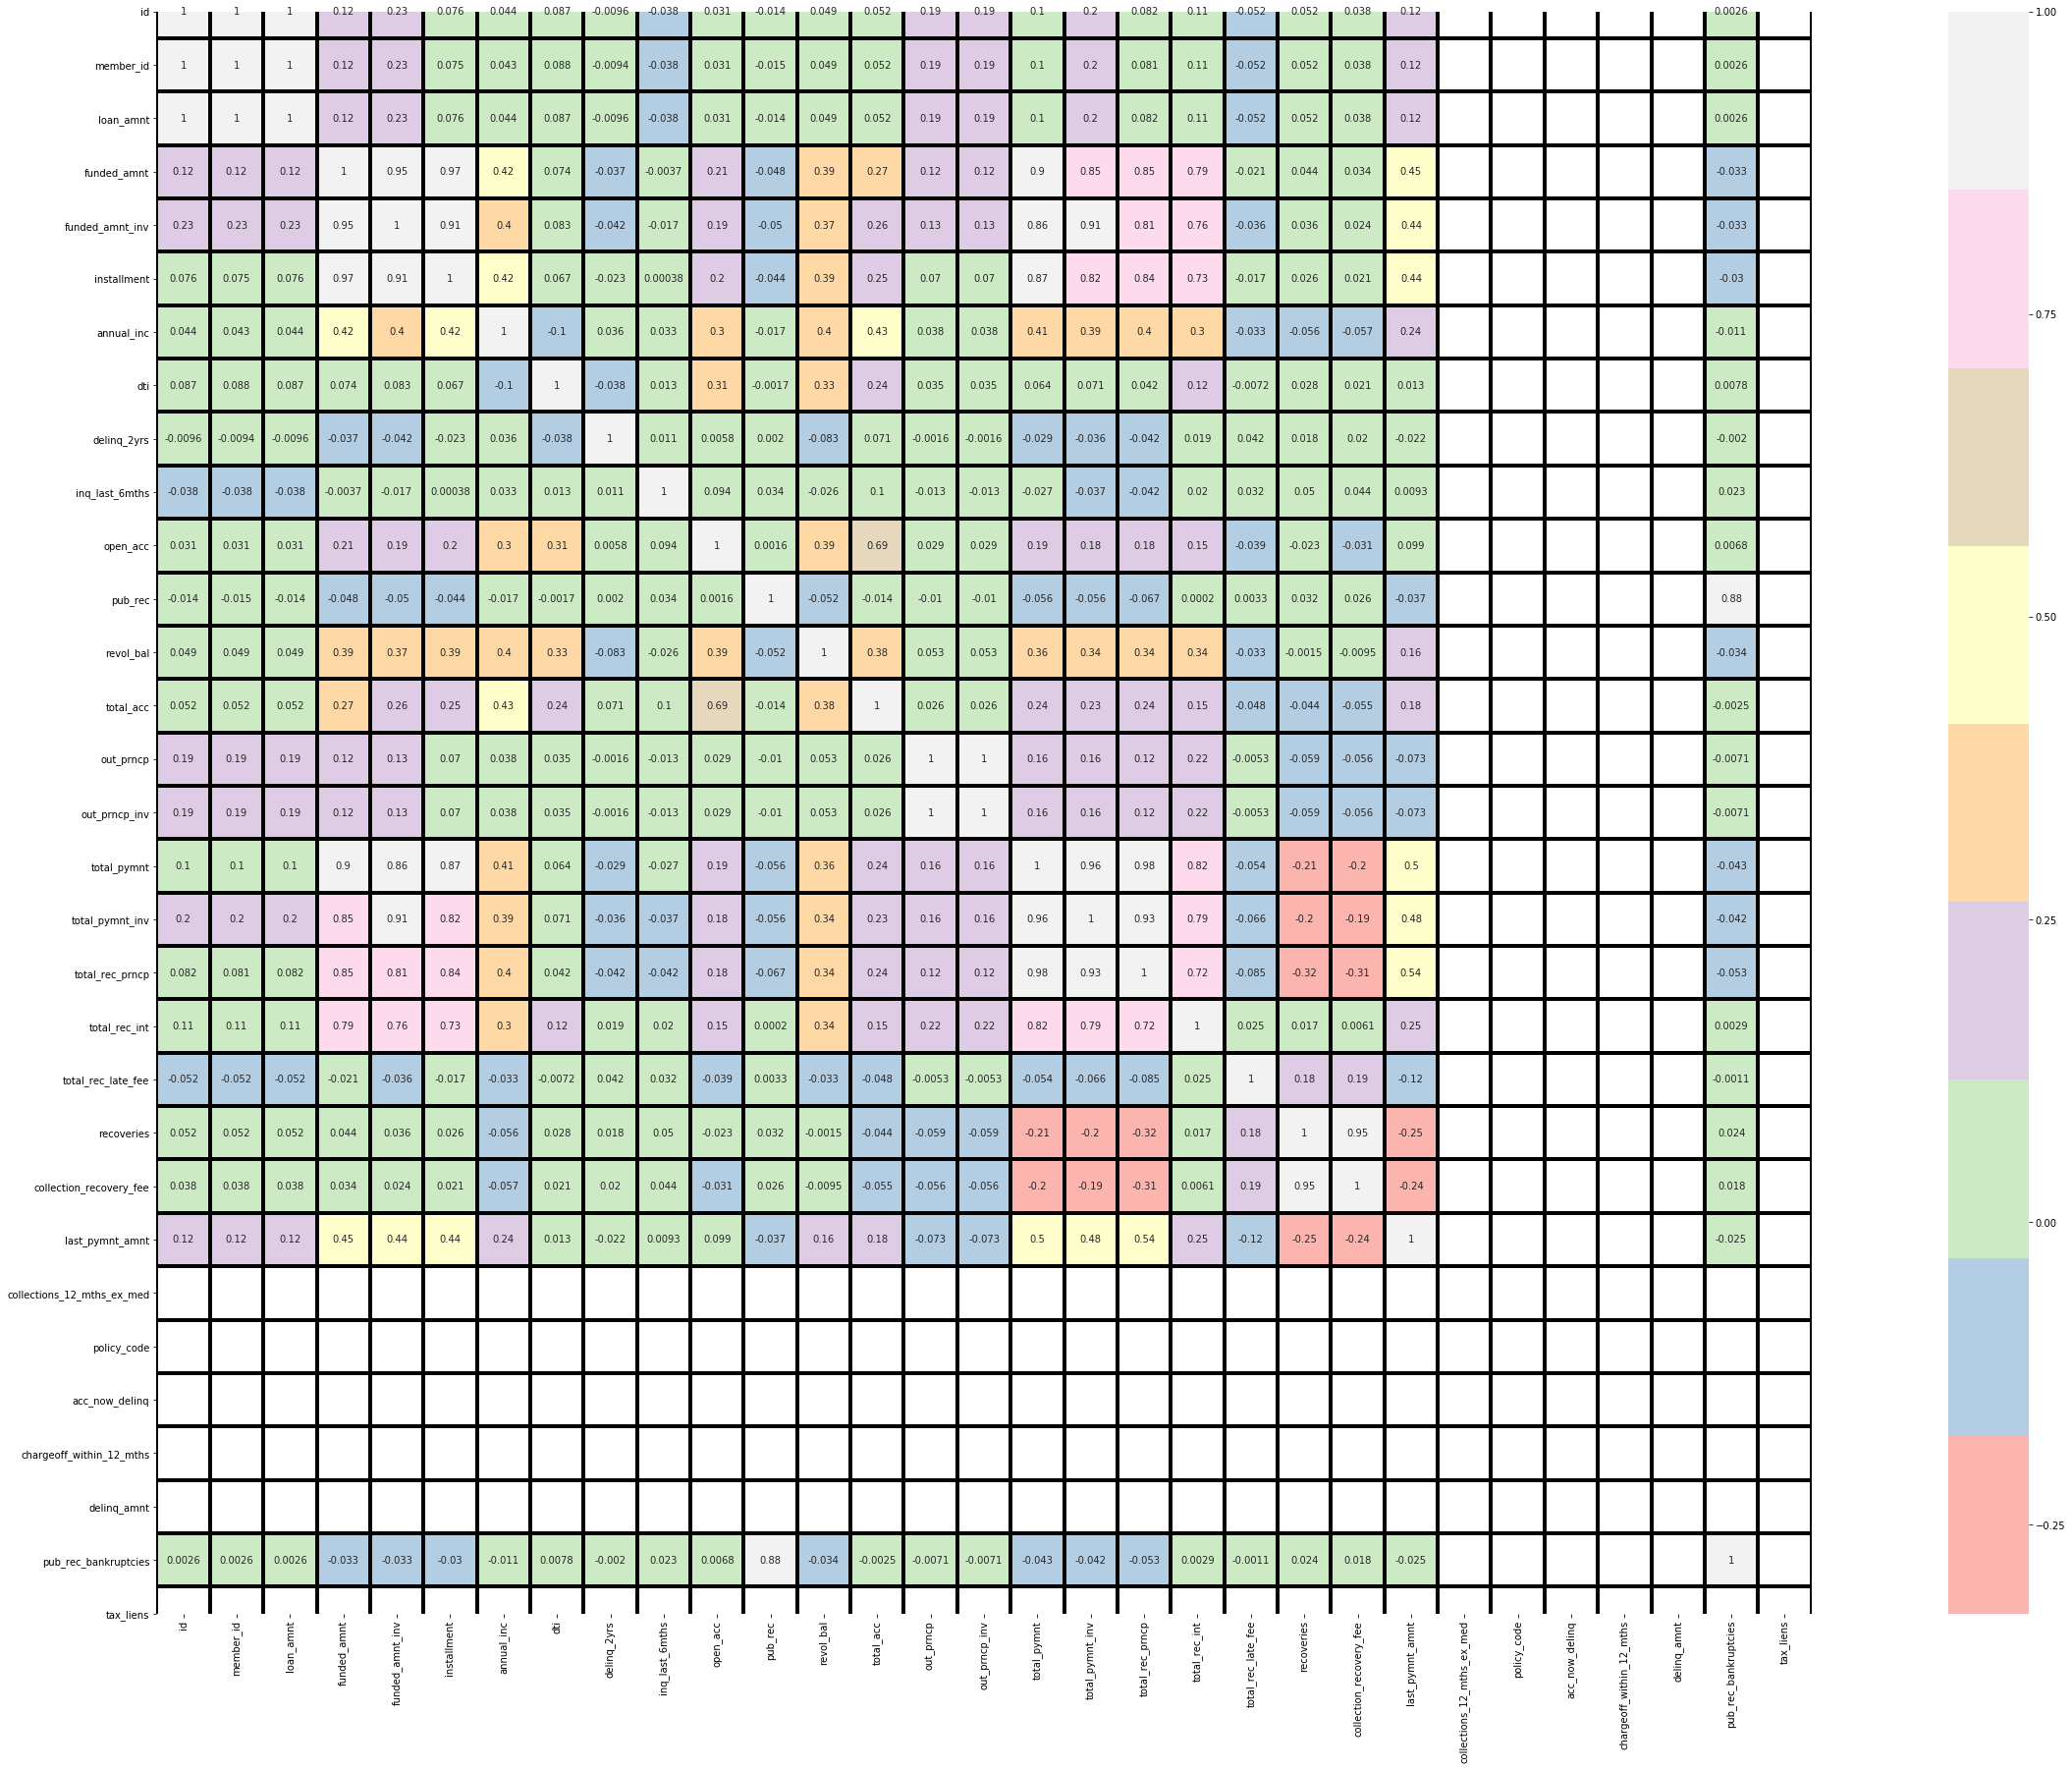

In [701]:
plot.figure(figsize=(50,30))
corr = after_na_loan.corr(method = 'spearman')
sns.heatmap(corr, annot=True, cmap = 'Pastel1', square = 'True', linewidths=3, linecolor='black')
plot.show()

In [702]:
#getting the correlation matrix into the csv format
c = after_na_loan.corr().abs()
s = c.unstack()

s.sort_values(ascending = False).to_csv('corr_matrix.csv')

/Users/z0043yk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


In [703]:
# check loan status based on purpose
purpose = after_na_loan.groupby(['purpose','loan_status']).count().reset_index()
display(purpose)

,purpose,loan_status,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,car,Charged Off,160,160,160,160,160,160,160,160,160,160,160,155,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160
1,car,Current,50,50,50,50,50,50,50,50,50,50,50,49,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
2,car,Fully Paid,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1293,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339,1338,1339,1339,1339,1338,1339,1339,1339
3,credit_card,Charged Off,542,542,542,542,542,542,542,542,542,542,542,510,542,542,542,542,542,542,542,542,542,542,542,542,542,542,542,542,542,542,542,542,542,542,542,542,542,542,542,542,539,542,542,541,542,542,542,541,542,542,541
4,credit_card,Current,103,103,103,103,103,103,103,103,103,103,103,101,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103
5,credit_card,Fully Paid,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,4389,4485,4485,4485,4485,4485,4485,4484,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,4473,4485,4485,4485,4473,4485,4485,4475
6,debt_consolidation,Charged Off,2767,2767,2767,2767,2767,2767,2767,2767,2767,2767,2767,2679,2767,2767,2767,2767,2767,2767,2766,2767,2767,2767,2767,2767,2767,2767,2767,2767,2767,2767,2767,2767,2767,2767,2767,2767,2767,2767,2767,2767,2738,2767,2767,2766,2767,2767,2767,2766,2767,2767,2767
7,debt_consolidation,Current,586,586,586,586,586,586,586,586,586,586,586,567,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586
8,debt_consolidation,Fully Paid,15288,15288,15288,15288,15288,15288,15288,15288,15288,15288,15288,14996,15288,15288,15288,15288,15288,15288,15286,15288,15288,15288,15288,15288,15288,15288,15288,15288,15288,15288,15288,15288,15288,15288,15288,15288,15288,15288,15288,15288,15288,15288,15288,15276,15288,15288,15288,15276,15288,15288,15281
9,educational,Charged Off,56,56,56,56,56,56,56,56,56,56,56,52,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,53,56,56,56,56,56,56,56,56,56,56


In [704]:
purpose2 = after_na_loan.groupby('purpose').count().reset_index()
display(purpose2)

,purpose,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,car,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1497,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1548,1549,1549,1549,1548,1549,1549,1549
1,credit_card,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5000,5130,5130,5130,5130,5130,5130,5130,5129,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5130,5127,5130,5130,5117,5130,5130,5130,5117,5130,5130,5119
2,debt_consolidation,18641,18641,18641,18641,18641,18641,18641,18641,18641,18641,18641,18242,18641,18641,18641,18641,18641,18641,18641,18638,18641,18641,18641,18641,18641,18641,18641,18641,18641,18641,18641,18641,18641,18641,18641,18641,18641,18641,18641,18641,18641,18612,18641,18641,18628,18641,18641,18641,18628,18641,18641,18634
3,educational,325,325,325,325,325,325,325,325,325,325,325,317,325,325,325,325,325,325,325,323,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,322,325,325,322,325,325,325,322,325,325,323
4,home_improvement,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2879,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976,2973,2976,2976,2967,2976,2976,2976,2967,2976,2976,2970
5,house,381,381,381,381,381,381,381,381,381,381,381,368,381,381,381,381,381,381,381,381,381,381,381,381,381,381,381,381,381,381,381,381,381,381,381,381,381,381,381,381,381,379,381,381,380,381,381,381,380,381,381,380
6,major_purchase,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187,2115,2187,2187,2187,2187,2187,2187,2187,2186,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187,2182,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187
7,medical,693,693,693,693,693,693,693,693,693,693,693,668,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,692,693,693,693,693,693,693,693,693,693,693
8,moving,583,583,583,583,583,583,583,583,583,583,583,559,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583,581,583,583,583,581,583,583,582
9,other,3993,3993,3993,3993,3993,3993,3993,3993,3993,3993,3993,3833,3993,3993,3993,3993,3993,3993,3993,3991,3993,3993,3993,3993,3993,3993,3993,3993,3993,3993,3993,3993,3993,3993,3993,3993,3993,3993,3993,3993,3993,3983,3993,3992,3987,3993,3993,3993,3987,3993,3993,3988


In [705]:
purpose2['id2'] = purpose2['id']


In [706]:
purpose3 = purpose[['id','loan_status','purpose']]
display(purpose3)


,id,loan_status,purpose
0,160,Charged Off,car
1,50,Current,car
2,1339,Fully Paid,car
3,542,Charged Off,credit_card
4,103,Current,credit_card
5,4485,Fully Paid,credit_card
6,2767,Charged Off,debt_consolidation
7,586,Current,debt_consolidation
8,15288,Fully Paid,debt_consolidation
9,56,Charged Off,educational


In [707]:
purpose4 = purpose2[['id2','purpose']]
display(purpose4)

,id2,purpose
0,1549,car
1,5130,credit_card
2,18641,debt_consolidation
3,325,educational
4,2976,home_improvement
5,381,house
6,2187,major_purchase
7,693,medical
8,583,moving
9,3993,other


In [708]:
merged = pd.merge(purpose3,purpose4,on='purpose',how = 'inner')

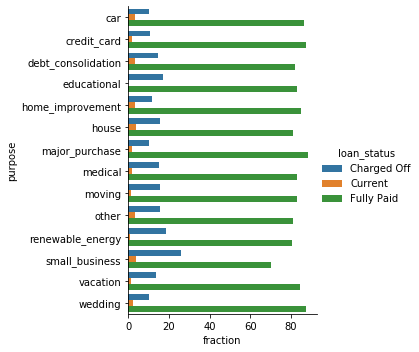

In [709]:
merged['fraction'] = merged['id']/merged['id2'] * 100
merged_2 = merged.groupby(['purpose','loan_status'])[['fraction']].sum().reset_index()
g = sns.catplot(y='purpose', x='fraction', hue='loan_status', kind='bar', data=merged);

/Users/z0043yk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


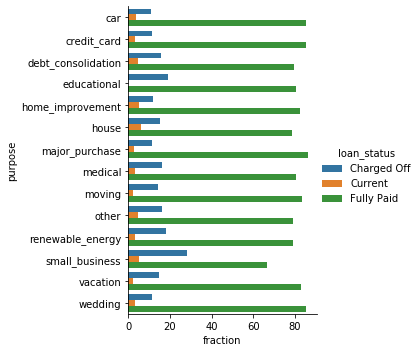

In [710]:
#check loan status based on amount
purpose_amnt = after_na_loan.groupby(['purpose','loan_status']).sum().reset_index()
purpose2_amnt = after_na_loan.groupby('purpose').sum().reset_index()
purpose3_amnt = purpose_amnt[['purpose','loan_status','funded_amnt']]
purpose4_amnt = purpose2_amnt[['purpose','funded_amnt']]
sum = purpose4_amnt['funded_amnt'].sum()
purpose4_amnt['main_fraction'] = purpose2_amnt['funded_amnt']/sum * 100
merged_amnt = pd.merge(purpose3_amnt,purpose4_amnt,on='purpose',how = 'inner')
merged_amnt['fraction'] = merged_amnt['funded_amnt_x']/merged_amnt['funded_amnt_y']*100
merged_amnt

h = sns.catplot(x='fraction', y='purpose', hue='loan_status', kind='bar', data=merged_amnt);

In [711]:
#getting the average interest rates for home_ownership types
after_na_loan['int_rate'] = after_na_loan['int_rate'].astype(str).str.split('%',expand = True)[0]
after_na_loan['int_rate'] = after_na_loan['int_rate'].astype(float)

home_mean = after_na_loan.groupby('home_ownership').median().reset_index()

home_mean[['home_ownership','int_rate']]

,home_ownership,int_rate
0,MORTGAGE,11.49
1,NONE,8.70
2,OTHER,11.86
3,OWN,11.58
4,RENT,12.21


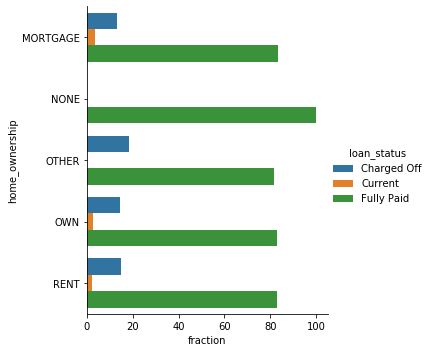

In [712]:
#check loan status based on the property type
home = after_na_loan.groupby(['home_ownership','loan_status']).count().reset_index()
home2 = after_na_loan.groupby('home_ownership').count().reset_index()

home2['id2'] = home2['id']
home3 = home[['id','loan_status','home_ownership']]
home4 = home2[['id2','home_ownership']]
merged_home = pd.merge(home3,home4,on='home_ownership',how = 'inner')
merged_home['fraction'] = merged_home['id']/merged_home['id2'] * 100
merged_home_2 = merged_home.groupby(['home_ownership','loan_status'])[['fraction']].sum().reset_index()

h = sns.catplot(y='home_ownership', x='fraction', hue='loan_status', kind='bar', data=merged_home);

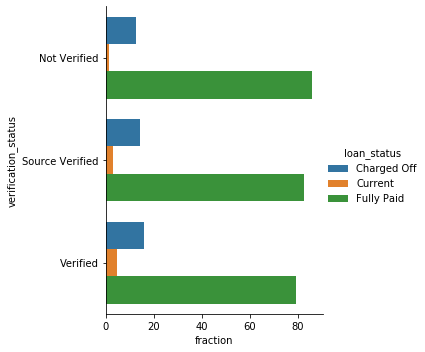

In [713]:
#check the loan status on verification
verification = after_na_loan.groupby(['verification_status','loan_status']).count().reset_index()
verification2 = after_na_loan.groupby('verification_status').count().reset_index()
verification2['id2'] = verification2['id']
verification3 = verification[['id','loan_status','verification_status']]
verification4 = verification2[['id2','verification_status']]
merged_verification = pd.merge(verification3,verification4,on='verification_status',how = 'inner')
merged_verification['fraction'] = merged_verification['id']/merged_verification['id2'] * 100
merged_verification_2 = merged_verification.groupby(['verification_status','loan_status'])[['fraction']].sum().reset_index()

g = sns.catplot(y='verification_status', x='fraction', hue='loan_status', kind='bar', data=merged_verification);

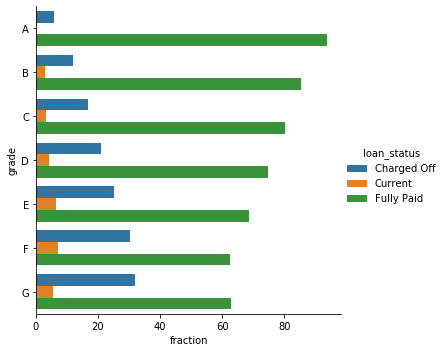

In [714]:
#check the loan status on grade
graded = after_na_loan.groupby(['grade','loan_status']).count().reset_index()
graded2 = after_na_loan.groupby('grade').count().reset_index()
graded2['id2'] = graded2['id']
graded3 = graded[['id','loan_status','grade']]
graded4 = graded2[['id2','grade']]
merged_grade = pd.merge(graded3,graded4,on='grade',how = 'inner')
merged_grade['fraction'] = merged_grade['id']/merged_grade['id2'] * 100
merged_grade_2 = merged_grade.groupby(['grade','loan_status'])[['fraction']].sum().reset_index()

g = sns.catplot(y='grade', x='fraction', hue='loan_status', kind='bar', data=merged_grade);

<Figure size 1200x800 with 0 Axes>

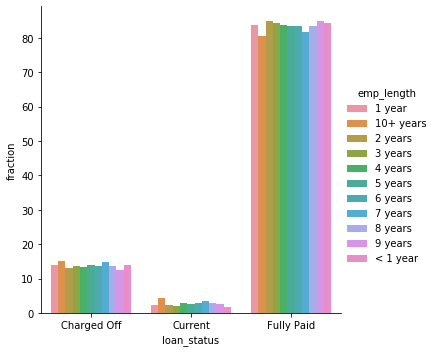

In [715]:
#employment length affect on loan_statuses

employement1 = after_na_loan.groupby(['emp_length','loan_status'])[['id']].count().reset_index()
employement2 = after_na_loan.groupby(['emp_length'])[['id']].count().reset_index()
merged_employee = pd.merge(employement1,employement2,on = 'emp_length',how= 'inner')


merged_employee['fraction'] = merged_employee['id_x']/merged_employee['id_y']*100

plot.figure(num=None, figsize=(12, 8), dpi=100, facecolor='w', edgecolor='k')
g = sns.catplot(x='loan_status', y='fraction', hue = 'emp_length',kind = 'bar',data=merged_employee)

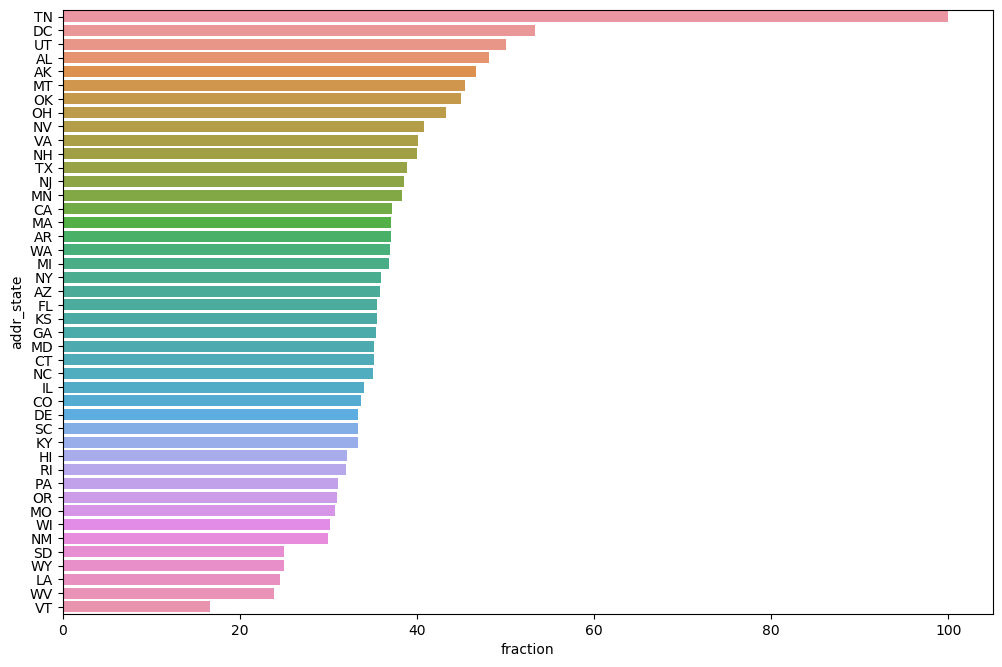

In [716]:
#Since verification status as 'verifies' has maximum charged off, checking statewise categorical verification
loan_charged = after_na_loan[after_na_loan['loan_status'] == 'Charged Off']

lc1 = loan_charged.groupby(["addr_state","verification_status"]).count().sort_values(by = 'id',ascending = False).reset_index()

lc2 = loan_charged.groupby('addr_state').count().sort_values(by = 'id',ascending = False).reset_index()
lc2['id2'] = lc2['id']
lc3 = lc1[['id','verification_status','addr_state']]
lc4 = lc2[['id2','addr_state']]
merged_lc = pd.merge(lc3,lc4,on='addr_state',how = 'inner')

merged_lc['fraction'] = merged_lc['id']/merged_lc['id2'] * 100

merged_lc_plot = merged_lc[merged_lc['verification_status']=='Verified'].sort_values(by = 'fraction',ascending = False)

plot.figure(num=None, figsize=(12, 8), dpi=100, facecolor='w', edgecolor='k')
g = sns.barplot(x='fraction', y='addr_state', data=merged_lc_plot)



loan_status  Charged Off  Current  Fully Paid
grade                                        
A                    602       40        9443
B                   1425      345       10250
C                   1347      264        6487
D                   1118      222        3967
E                    715      179        1948
F                    319       73         657
G                    101       17         198


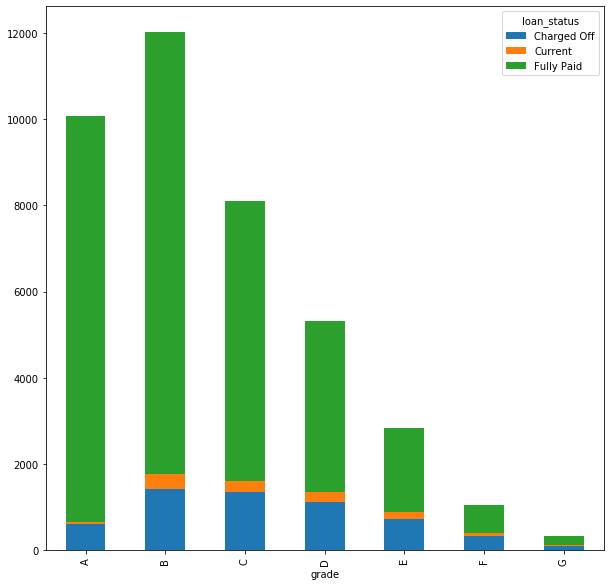

In [717]:
#Loan grade affect on loan_statuses
g = after_na_loan.groupby(['grade','loan_status'])['grade'].count().unstack('loan_status').fillna(0)
print(g)
g.plot(kind='bar', stacked=True,figsize=(10,10))

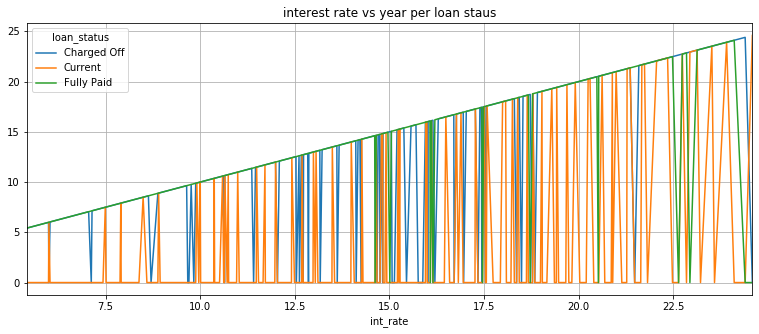

In [718]:
# Interest rate affect on loan statuses

after_na_loan.groupby([
   'int_rate', 'loan_status'
])['int_rate'].median().unstack('loan_status').fillna(0).plot(
   kind='line',
   grid=True,
   figsize=(13, 5),
   title='interest rate vs year per loan staus')



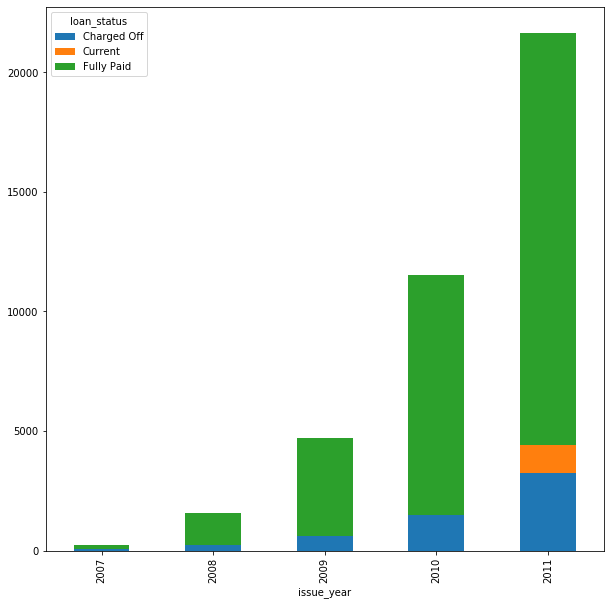

In [719]:
#check the loan status on issue year
after_na_loan['issue_year']=after_na_loan['issue_d'].dt.year
after_na_loan.groupby(by=['issue_year','loan_status']).size()

g = after_na_loan.groupby(['issue_year','loan_status'])['issue_year'].count().unstack('loan_status').fillna(0)
g.plot(kind='bar', stacked=True,figsize=(10,10))

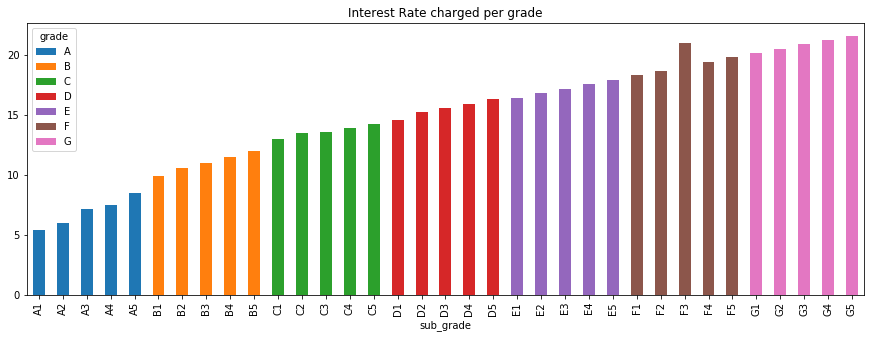

In [720]:
#check the grades status on insterest rate
after_na_loan.groupby(by=['grade', 'sub_grade'])['int_rate'].median().unstack(
   'grade').fillna(0).plot(
       kind='bar', stacked=True, figsize=(15, 5),title='Interest Rate charged per grade')

## Univariate Analysis

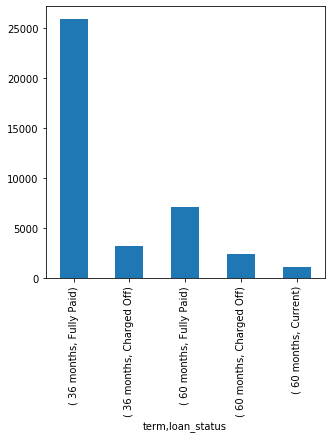

In [721]:
# Term length status on loan status
g = after_na_loan.groupby('term')['loan_status'].value_counts()
g.plot(kind='bar', stacked=True,figsize=(5,5))

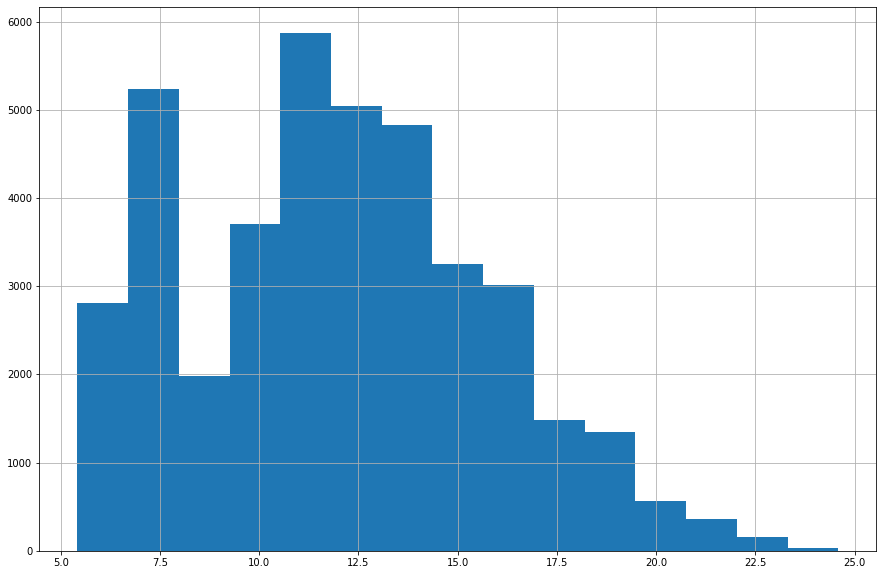

In [722]:
# Variation of interest rate
after_na_loan['int_rate'].hist(bins=15,figsize=(15,10))

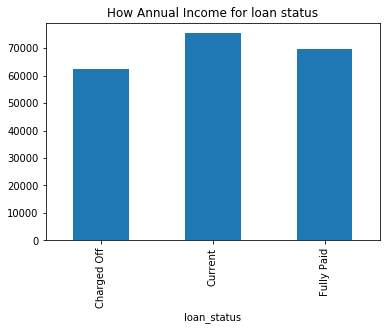

In [723]:
# Annual Income on loan status
after_na_loan.groupby('loan_status')['annual_inc'].mean().plot(kind='bar',title = 'How Annual Income for loan status')

In [724]:
display(after_na_loan['funded_amnt_inv'].describe().reset_index())

,index,funded_amnt_inv
0,count,39717.000000
1,mean,10397.448868
2,std,7128.450439
3,min,0.000000
4,25%,5000.000000
5,50%,8975.000000
6,75%,14400.000000
7,max,35000.000000


In [725]:
display(after_na_loan['loan_amnt'].describe().astype(int).reset_index())

,index,loan_amnt
0,count,39717
1,mean,683131
2,std,210694
3,min,54734
4,25%,516221
5,50%,665665
6,75%,837755
7,max,1077501


In [726]:
after_na_loan.dtypes

id                                     int64
member_id                              int64
loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
term                                  object
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_title                             object
emp_length                            object
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
pymnt_plan                            object
url                                   object
purpose                               object
title                                 object
zip_code                              object
addr_state

In [727]:
display(after_na_loan['int_rate'].describe().reset_index())

,index,int_rate
0,count,39717.000000
1,mean,12.021177
2,std,3.724825
3,min,5.420000
4,25%,9.250000
5,50%,11.860000
6,75%,14.590000
7,max,24.590000


In [728]:
#calculating maximum number of loans under the home ownership dtype
display(after_na_loan.groupby('home_ownership')[['funded_amnt']].count().reset_index().sort_values(by = 'funded_amnt',ascending = False))


,home_ownership,funded_amnt
4,RENT,18899
0,MORTGAGE,17659
3,OWN,3058
2,OTHER,98
1,NONE,3


In [729]:
#calculating maximum number of verification status
display(after_na_loan.groupby('verification_status')[['funded_amnt']].count().reset_index().sort_values(by = 'funded_amnt',ascending = False))


,verification_status,funded_amnt
0,Not Verified,16921
2,Verified,12809
1,Source Verified,9987


In [730]:
#calculating the maximum number of loans by loan_status
display(after_na_loan.groupby('loan_status')[['funded_amnt']].count().reset_index().sort_values(by = 'funded_amnt',ascending = False))


,loan_status,funded_amnt
2,Fully Paid,32950
0,Charged Off,5627
1,Current,1140


In [731]:
#calculating maximum number of loans by purpose
display(after_na_loan.groupby('purpose')[['funded_amnt']].count().reset_index().sort_values(by = 'funded_amnt',ascending = False))


,purpose,funded_amnt
2,debt_consolidation,18641
1,credit_card,5130
9,other,3993
4,home_improvement,2976
6,major_purchase,2187
11,small_business,1828
0,car,1549
13,wedding,947
7,medical,693
8,moving,583


In [732]:
#calculating maximum number of loans by purpose
display(after_na_loan.groupby('emp_length')[['funded_amnt']].count().reset_index().sort_values(by = 'funded_amnt',ascending = False))

,emp_length,funded_amnt
1,10+ years,8879
10,< 1 year,4583
2,2 years,4388
3,3 years,4095
4,4 years,3436
5,5 years,3282
0,1 year,3240
6,6 years,2229
7,7 years,1773
8,8 years,1479


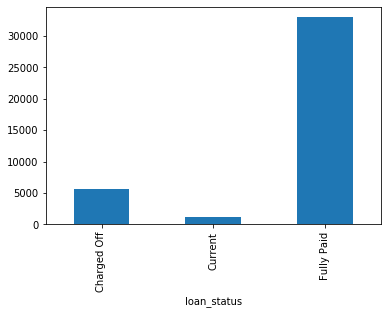

In [733]:
# enquiry within 6 months
after_na_loan.groupby('loan_status')['inq_last_6mths'].size().plot(kind='bar')

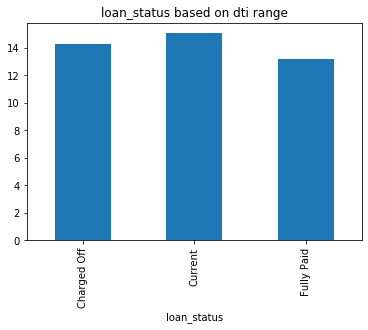

In [734]:
after_na_loan.groupby('loan_status')['dti'].median().plot(kind='bar',title='loan_status based on dti range')



